# Test hamf

In [1]:
from ultralytics import YOLO
import cv2
import pytesseract
from OcrOutput import OcrOutput
import numpy as np
model = YOLO('best ocr.pt')

In [2]:
res = model.predict(source= r"C:\Users\levie\Downloads\dataset ocr bien so\train\images\8xemay1199.jpg", conf = 0.3, verbose = False)

In [3]:
lbs = model.names
lbs

{0: '0',
 1: '1',
 2: '2',
 3: '3',
 4: '4',
 5: '5',
 6: '6',
 7: '7',
 8: '8',
 9: '9',
 10: 'A',
 11: 'B',
 12: 'C',
 13: 'D',
 14: 'E',
 15: 'F',
 16: 'G',
 17: 'H',
 18: 'I',
 19: 'J',
 20: 'K',
 21: 'L',
 22: 'M',
 23: 'N',
 24: 'O',
 25: 'P',
 26: 'Q',
 27: 'R',
 28: 'S',
 29: 'T',
 30: 'U',
 31: 'V',
 32: 'W',
 33: 'X',
 34: 'Y',
 35: 'Z'}

In [32]:
res[0].boxes.conf.

tensor(0.9032)

In [5]:
cls = res[0].boxes.cls
cls = cls.reshape(-1, 1)
cls

tensor([[ 9.],
        [ 5.],
        [ 7.],
        [ 8.],
        [33.],
        [ 9.],
        [ 4.],
        [ 2.]])

In [6]:
xy = res[0].boxes.xywh[:, :2]
xy = np.array(xy)
xy

array([[     585.32,      380.53],
       [     216.56,      144.58],
       [     580.36,      143.99],
       [     342.92,      382.41],
       [     488.35,       145.6],
       [     462.97,      380.99],
       [     312.96,      147.79],
       [     220.11,      385.86]], dtype=float32)

In [7]:
data = np.hstack([xy, cls])
# data[data[:, 1] > np.mean(data[:, 1])]
data

array([[     585.32,      380.53,           9],
       [     216.56,      144.58,           5],
       [     580.36,      143.99,           7],
       [     342.92,      382.41,           8],
       [     488.35,       145.6,          33],
       [     462.97,      380.99,           9],
       [     312.96,      147.79,           4],
       [     220.11,      385.86,           2]], dtype=float32)

In [8]:
import numpy as np

class OcrOutput():
    '''Input is array 2D dimensions included fisrt collums is x_center, second is y_center and thirt is lable encoder'''
    def __init__(self, data: np.array, labels_encoder: dict):
        self.data = data.copy()
        self.labels_encoder = labels_encoder
        self.out_ocr = None

        delta = np.max(self.data[:, 1]) - np.min(self.data[:, 1])
        
        if(delta > 20):
            y_mean = np.mean(self.data[:, 1])
            
            line1 = data[data[:, 1] < y_mean]
            line2 = data[data[:, 1] >= y_mean]

            line1 = line1[line1[:, 0].argsort()]
            line2 = line2[line2[:, 0].argsort()]

            self.out_ocr = ''.join([self.labels_encoder[item] for item in line1[:,-1]])
            self.out_ocr += '-' + ''.join([self.labels_encoder[item] for item in line2[:,-1]])
        else:
            self.data = self.data[self.data[:, 0].argsort()]
            self.out_ocr = ''.join([self.labels_encoder[item] for item in self.data[:,-1]])

    def __call__(self, *args, **kwds):
        return self.out_ocr

In [9]:
a = OcrOutput(data= data, labels_encoder= lbs)
a.out_ocr

'54X7-2899'

In [10]:
b = OcrOutput(data= data, labels_encoder= lbs)
b.out_ocr

'54X7-2899'

In [11]:
delta = np.max(data[:, 1]) - np.min(data[:, 1])
delta

np.float32(241.87238)

In [12]:
data = data[data[:, 0].argsort()]

In [13]:
c = np.array([[]])
c.shape

(1, 0)

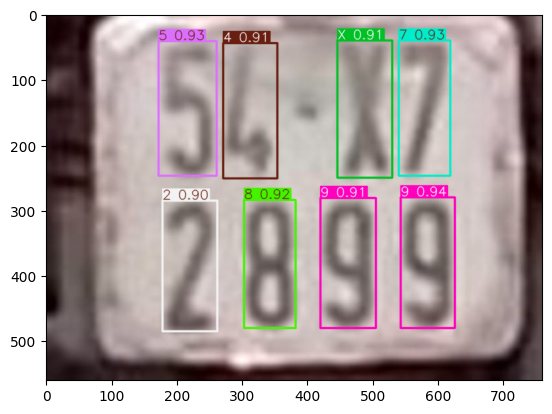

In [14]:
from matplotlib import pyplot as plt

plt.imshow(res[0].plot())
plt.axis = 'off'

In [15]:
labels = model.names

In [16]:
cls = res[0].boxes.cls

In [17]:
labels[int(cls[0])]

'9'

In [18]:
a = [[1, 2]]
b = [[3, 4]]

In [19]:
a.extend(b)
a

[[1, 2], [3, 4]]